<a href="https://colab.research.google.com/github/aalarina/CustomerChurnKNN/blob/main/CustomerChurnKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
sns.set(rc={'figure.figsize':(6, 6)});

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bigml_59c28831336c6604c800002a.csv')

In [ ]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Choose the target variable and determine the type of supervised learning task — classification or regression

The target feature in this dataset is Churn.
The task is classification.

## What is the distribution of the target variable values?

<Axes: xlabel='churn', ylabel='count'>

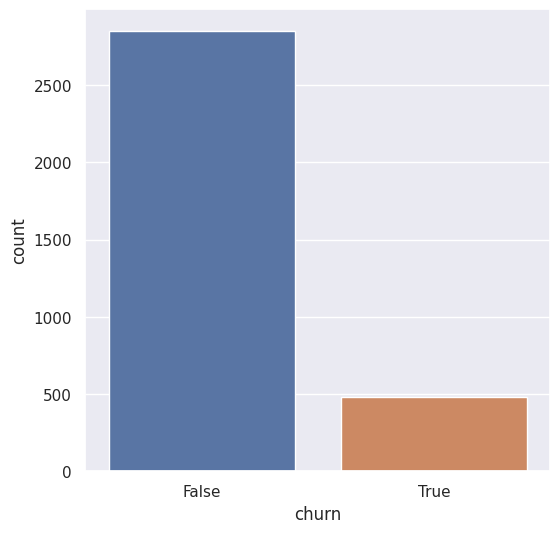

In [ ]:
sns.countplot(df, x='churn')

# 1. Nearest neighbour methods

## Perform the necessary preprocessing of data. To build models using metric methods, all features must be encoded with numbers.

In [ ]:
df['international plan'] = df['international plan'].map({'no': 0, 'yes':1})
df['voice mail plan'] = df['voice mail plan'].map({'no': 0, 'yes':1})
df = df.drop(['phone number','state'], axis=1)

In [ ]:
df["churn"] = df["churn"].astype("int64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

## Divide the dataset into training and validation (test) samples using the train_test_split method.

In [ ]:
from sklearn.model_selection import train_test_split
drop_churn  = df.drop('churn', axis=1)
ch = df['churn']
x_train, x_valid, y_train, y_valid = train_test_split(drop_churn, ch, test_size=0.25, random_state=4)

## Train the kNeighborsClassifier classification algorithm.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_valid)

In [ ]:
print(y_valid[:10], y_pred[:10])

2540    0
376     0
3043    0
2118    1
2003    0
2159    0
1595    0
409     0
1473    0
2344    0
Name: churn, dtype: int64 [0 0 0 0 0 0 0 0 0 0]


The **balanced accuracy** in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

In [ ]:
from sklearn.metrics import balanced_accuracy_score
print(balanced_accuracy_score(y_valid, y_pred))

0.6260680495974613


# 2. Setting the optimal number of nearest neighbours in the kNN method

## Perform cross-validation of the model with the number of neighbours k ∈ [1;50]

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, {'n_neighbors': np.arange(1, 50, 2)}, cv=5, scoring='balanced_accuracy')
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='balanced_accuracy')

What is this quality estimate equal to?

In [ ]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=1)

At what k did the quality turn out to be the best?

In [ ]:
knn_grid.best_params_

{'n_neighbors': 1}

In [ ]:
knn_grid.best_score_

0.6111558909812895

In [ ]:
best_knn = knn_grid.best_estimator_
y_pred = best_knn.predict(x_valid)

In [ ]:
print(balanced_accuracy_score(y_valid, y_pred))

0.6177234530175706


Balanced accuracy is less than 0.7

### Plot a graph of the metric values depending on k

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=50, shuffle=True, random_state=12)
tree = KNeighborsClassifier()
scores = cross_val_score(tree, drop_churn, ch, cv=kf, scoring='balanced_accuracy')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [0.65384615 0.73245614 0.77738095 0.60249042 0.59957627 0.53257576
 0.65804598 0.54122807 0.69761905 0.61652542 0.67288961 0.61850649
 0.73305085 0.54166667 0.52368421 0.53245614 0.5        0.61491228
 0.61850649 0.54545455 0.69038462 0.74122807 0.59193548 0.53652597
 0.63452381 0.61111111 0.48333333 0.61850649 0.57305195 0.65846995
 0.74152542 0.60249042 0.6408046  0.63214286 0.53663793 0.76029056
 0.68214286 0.53846154 0.66666667 0.59090909 0.53846154 0.59090909
 0.63497823 0.60895884 0.62727273 0.56748911 0.73214286 0.58214286
 0.64107143 0.65      ]
Средняя метрика на кросс-валидации: 0.6203488182124794


In [ ]:
tree_params={'n_neighbors': np.arange(1, 50, 2)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='balanced_accuracy')

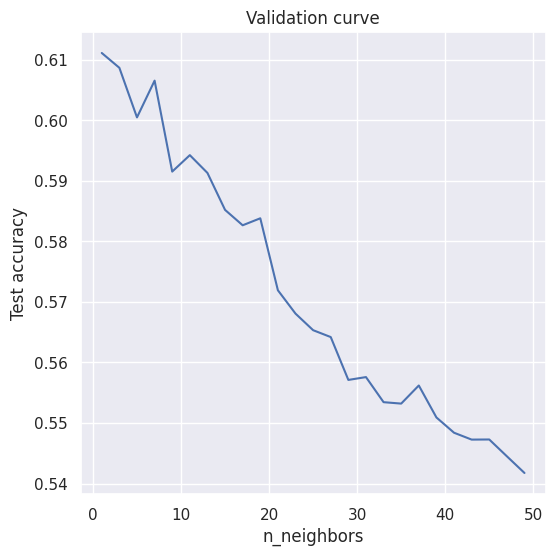

In [ ]:
import matplotlib.pyplot as plt
tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='balanced_accuracy')
tree_grid.fit(x_train, y_train)

results_df = pd.DataFrame(tree_grid.cv_results_)
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_score'])

plt.xlabel('n_neighbors')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

# 3. Choosing a metric in the kNN method

## Try out different values for p on a grid from 1 to 10 with a step size that tests a total of 20 options.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNR

kf = KFold(n_splits=5, shuffle=True, random_state=12)

In [ ]:
spisok = []
for p in np.linspace(1, 10, 20):
    estimator = KNeighborsClassifier(metric='minkowski', weights='distance', p=p)
    results = cross_val_score(estimator=estimator, X=drop_churn, y=ch, cv=kf,
    scoring='balanced_accuracy', )
    spisok.append(np.mean(results))
    print(estimator, np.mean(results))


KNeighborsClassifier(p=1.0, weights='distance') 0.6218075007064825
KNeighborsClassifier(p=1.4736842105263157, weights='distance') 0.6203731043433339
KNeighborsClassifier(p=1.9473684210526314, weights='distance') 0.6196916343777753
KNeighborsClassifier(p=2.4210526315789473, weights='distance') 0.6186823430811578
KNeighborsClassifier(p=2.894736842105263, weights='distance') 0.6121084799198555
KNeighborsClassifier(p=3.3684210526315788, weights='distance') 0.6108102718854218
KNeighborsClassifier(p=3.8421052631578947, weights='distance') 0.6093230983056024
KNeighborsClassifier(p=4.315789473684211, weights='distance') 0.6109951535422888
KNeighborsClassifier(p=4.789473684210526, weights='distance') 0.6143120986885898
KNeighborsClassifier(p=5.263157894736842, weights='distance') 0.6109441226562901
KNeighborsClassifier(p=5.7368421052631575, weights='distance') 0.6109419793617401
KNeighborsClassifier(p=6.2105263157894735, weights='distance') 0.6073375109337811
KNeighborsClassifier(p=6.6842105263

In [ ]:
np.max(spisok)

0.6218075007064825

## Try adjusting two hyperparameters simultaneously: the number of neighbours and the metric (parameter p ) using grid search. If the algorithm takes too long, try reducing the number of options to search through.

In [ ]:
kn = KNeighborsClassifier()
kn_grid = GridSearchCV(kn, {'n_neighbors': np.arange(1, 10, 2), 'p': np.linspace(1, 10, 10)}, cv=5, scoring='balanced_accuracy')
kn_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 3, 5, 7, 9]),
                         'p': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             scoring='balanced_accuracy')

In [ ]:
kn_grid.best_params_

{'n_neighbors': 1, 'p': 1.0}

In [ ]:
kn_grid.best_score_

0.6251648166565077